In [1]:
import pyro
import mfmf
import torch
import mofax as mfx
import matplotlib.pyplot as plt
import seaborn as sns

from mofapy2.run.entry_point import entry_point
import pandas as pd
import numpy as np

N_FACTORS = 6

In [2]:
optimizer = pyro.optim.Adam({"lr": 0.2, "betas": (0.90, 0.999)})
loss = mfmf.loss.EarlyStoppingLoss(
    loss_fn=pyro.infer.Trace_ELBO(num_particles=1, vectorize_particles=True),
    epochs=1200,
    report_after_n_epochs=100,
    min_decrease=0.001,
    max_flat_intervals=3,
)

fm = mfmf.model.FactorModel(
    optimizer=optimizer,
    loss=loss,
    device="cuda",
)

imp = mfmf.importer.Importer()
cll_data = imp.load_CLL()
# fm.add_MultiView(cll_data)
fm.add_View("mrna", cll_data["mrna"])
# fm.add_View("mutations", cll_data["mutations"])

fm.fit(n_factors=5, feature_reg="horseshoe", dry_run=False)


ValueError: Error while computing log_prob at site 'y_mrna_all_features_all_observations':
Value is not broadcastable with batch_shape+event_shape: torch.Size([136, 5000]) vs torch.Size([136, 5, 5000]).
                            Trace Shapes:               
                             Param Sites:               
                            Sample Sites:               
            hs_tau_mrna_all_features dist            1 |
                                    value            1 |
                                 log_prob            1 |
         hs_lambda_mrna_all_features dist       5 5000 |
                                    value       5 5000 |
                                 log_prob       5 5000 |
                 w_mrna_all_features dist       5 5000 |
                                    value       5 5000 |
                                 log_prob       5 5000 |
                                 tau dist            1 |
                                    value            1 |
                                 log_prob            1 |
                  z_all_observations dist 136   5    5 |
                                    value 136   5    5 |
                                 log_prob 136   5    5 |
y_mrna_all_features_all_observations dist 136   5 5000 |
                                    value     136 5000 |

<AxesSubplot:>

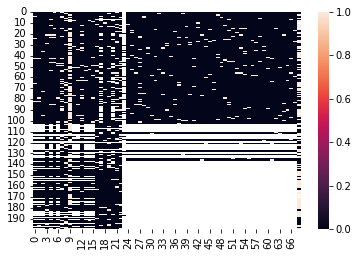

In [ ]:
sns.heatmap(cll_data["mutations"].X)

<AxesSubplot:>

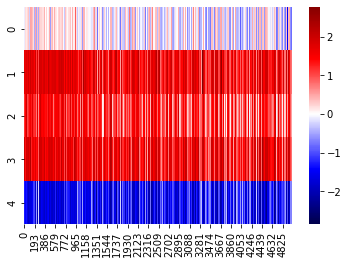

In [ ]:
sns.heatmap(fm.data["mrna_all_features"]["w"].cpu().detach().numpy(), cmap="seismic", center=0)

In [ ]:
fm = mfmf.model.FactorModel(
    optimizer=optimizer,
    loss=loss,
    device="cuda",
)

imp = mfmf.importer.Importer()
cll_data = imp.load_CLL()
fm.add_View("mrna", cll_data["mrna"])
fm.add_View("mutations", cll_data["mutations"])

fm.fit(
    n_factors=5, 
    likelihood={
        "mrna": pyro.distributions.Normal, 
        "mutations": pyro.distributions.Bernoulli
    },
    dry_run=True
)


╒════════════════════════════════════╤════════════════════════════╤═════════════════════════════════╕
│                                    │ ('mrna', 'all_features')   │ ('mutations', 'all_features')   │
╞════════════════════════════════════╪════════════════════════════╪═════════════════════════════════╡
│ ('all_observations', 'likelihood') │ Normal                     │ Bernoulli                       │
╘════════════════════════════════════╧════════════════════════════╧═════════════════════════════════╛


In [ ]:
fm = mfmf.model.FactorModel(
    optimizer=optimizer,
    loss=loss,
    device="cuda",
)

imp = mfmf.importer.Importer()
cll_data = imp.load_CLL()
fm.add_View("mrna", cll_data["mrna"])
fm.add_View("mutations", cll_data["mutations"])

fm.fit(
    n_factors=5, 
    likelihood={
        "mrna": pyro.distributions.Normal, 
        "mutations": pyro.distributions.Bernoulli
    },
    feature_reg={
        "mrna": "horseshoe", 
        "mutations": "spike-n-slab"
    },
    sample_reg={
        "mrna": "finnish_horseshoe", 
        "mutations": "finnish_horseshoe"
    },
    dry_run=True
)


╒═════════════════════════════════════╤════════════════════════════╤═════════════════════════════════╕
│                                     │ ('mrna', 'all_features')   │ ('mutations', 'all_features')   │
╞═════════════════════════════════════╪════════════════════════════╪═════════════════════════════════╡
│ ('all_observations', 'likelihood')  │ Normal                     │ Bernoulli                       │
├─────────────────────────────────────┼────────────────────────────┼─────────────────────────────────┤
│ ('all_observations', 'feature_reg') │ horseshoe                  │ spike-n-slab                    │
├─────────────────────────────────────┼────────────────────────────┼─────────────────────────────────┤
│ ('all_observations', 'sample_reg')  │ finnish_horseshoe          │ finnish_horseshoe               │
╘═════════════════════════════════════╧════════════════════════════╧═════════════════════════════════╛


In [ ]:
fm = mfmf.model.FactorModel(
    optimizer=optimizer,
    loss=loss,
    device="cuda",
)

imp = mfmf.importer.Importer()
cll_data = imp.load_CLL()
fm.add_View("mrna", cll_data["mrna"])
fm.add_View("mutations", cll_data["mutations"])

fm.add_covariates(
    level="obs", 
    flavour="unordered", 
    covariates={
        "control": fm.obs_names[:50], 
        "treatment": fm.obs_names[50:]
    }
)

fm.fit(
    n_factors=5, 
    likelihood={
        "mrna": pyro.distributions.Normal, 
        "mutations": pyro.distributions.Bernoulli
    },
    feature_reg={
        "mrna": "horseshoe", 
        "mutations": "spike-n-slab"
    },
    sample_reg={
        "mrna": "finnish_horseshoe", 
        "mutations": "finnish_horseshoe"
    },
    dry_run=True
)


╒══════════════════════════════╤════════════════════════════╤═════════════════════════════════╕
│                              │ ('mrna', 'all_features')   │ ('mutations', 'all_features')   │
╞══════════════════════════════╪════════════════════════════╪═════════════════════════════════╡
│ ('control', 'likelihood')    │ Normal                     │ Bernoulli                       │
├──────────────────────────────┼────────────────────────────┼─────────────────────────────────┤
│ ('control', 'feature_reg')   │ horseshoe                  │ spike-n-slab                    │
├──────────────────────────────┼────────────────────────────┼─────────────────────────────────┤
│ ('control', 'sample_reg')    │ finnish_horseshoe          │ finnish_horseshoe               │
├──────────────────────────────┼────────────────────────────┼─────────────────────────────────┤
│ ('treatment', 'likelihood')  │ Normal                     │ Bernoulli                       │
├──────────────────────────────┼────────

In [ ]:
fm = mfmf.model.FactorModel(
    optimizer=optimizer,
    loss=loss,
    device="cuda",
)

imp = mfmf.importer.Importer()
cll_data = imp.load_CLL()
fm.add_View("mrna", cll_data["mrna"])
fm.add_View("mutations", cll_data["mutations"])

fm.add_covariates(
    level="obs", 
    flavour="unordered", 
    covariates={
        "control": fm.obs_names[:50], 
        "treatment": fm.obs_names[50:]
    }
)

fm.add_covariates(
    level="features", 
    flavour="unordered", 
    view="mrna",
    covariates={
        "my_pathway": fm.views["mrna"].feature_names[:50], 
        "rest": fm.views["mrna"].feature_names[50:]
    }
)

fm.fit(
    n_factors=5, 
    likelihood={
        "mrna": pyro.distributions.Normal, 
        "mutations": pyro.distributions.Bernoulli
    },
    feature_reg={
        "mrna": "horseshoe", 
        "mutations": "spike-n-slab"
    },
    sample_reg={
        "control": {
            "mrna": "horseshoe", 
            "mutations": "finnish_horseshoe"
        },
        "treatment": {
            "mrna": "finnish_horseshoe", 
            "mutations": "horseshoe"
        }
    },
    dry_run=True
)


╒══════════════════════════════╤══════════════════════════╤════════════════════╤═════════════════════════════════╕
│                              │ ('mrna', 'my_pathway')   │ ('mrna', 'rest')   │ ('mutations', 'all_features')   │
╞══════════════════════════════╪══════════════════════════╪════════════════════╪═════════════════════════════════╡
│ ('control', 'likelihood')    │ Normal                   │ Normal             │ Bernoulli                       │
├──────────────────────────────┼──────────────────────────┼────────────────────┼─────────────────────────────────┤
│ ('control', 'feature_reg')   │ horseshoe                │ horseshoe          │ spike-n-slab                    │
├──────────────────────────────┼──────────────────────────┼────────────────────┼─────────────────────────────────┤
│ ('control', 'sample_reg')    │ horseshoe                │ horseshoe          │ finnish_horseshoe               │
├──────────────────────────────┼──────────────────────────┼────────────────────┼